# MNIST dataset.
> Digit recognition using pytorch

## 0. Imports

In [1]:
import torch
from torch import nn
from torch import optim
from collections import OrderedDict
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
%matplotlib inline

# Transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                              ])
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

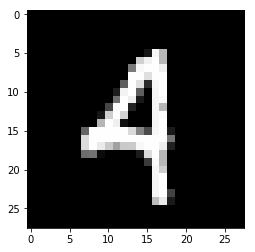

In [2]:
images, labels = next(iter(trainloader))
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');

In [3]:
images.shape

torch.Size([64, 1, 28, 28])

## 1. Model Architecture

In [4]:
model = nn.Sequential(OrderedDict([
    ('fc1',nn.Linear(784,128)),
    ('relu1',nn.ReLU()),
    ('fc2',nn.Linear(128,64)),
    ('relu2',nn.ReLU()),
    ('fc3',nn.Linear(64,10)),
    ('out',nn.LogSoftmax(dim = 1))]))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(),lr= 0.003)
print(model)


Sequential(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=64, out_features=10, bias=True)
  (out): LogSoftmax()
)


## 2. Training

In [5]:
epochs = 6
for epoch in range(epochs):
    sum_loss = 0
    for images, labels in trainloader:
        # flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0],-1)
        # Gradient gets accumulated __ clear them.
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        # Backward pass
        loss.backward()
        # Update weight
        optimizer.step()
        sum_loss += loss.item()
    else:
        print('Training Loss: ',sum_loss/len(trainloader))
        
    

Training Loss:  1.8707240272178325
Training Loss:  0.8454573107744331
Training Loss:  0.5310048609654278
Training Loss:  0.4340800451539727
Training Loss:  0.38769143743555684
Training Loss:  0.3595276901812187


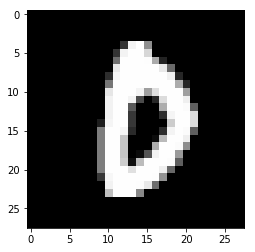

In [6]:
images, labels = next(iter(trainloader))
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');
img = images[0].view(1, 784)

In [7]:
out_l = model(img)
out_l

tensor([[ -5.7171, -13.1260,  -6.6059,  -8.5680,  -3.7837,  -4.0472,  -0.0502,
         -13.0486,  -6.2579,  -6.2339]], grad_fn=<LogSoftmaxBackward>)

In [8]:
torch.exp(out_l)

tensor([[3.2893e-03, 1.9927e-06, 1.3524e-03, 1.9009e-04, 2.2738e-02, 1.7471e-02,
         9.5108e-01, 2.1532e-06, 1.9153e-03, 1.9617e-03]],
       grad_fn=<ExpBackward>)

## 3. Results

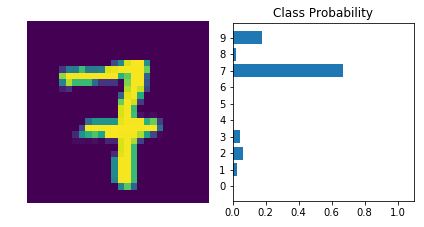

In [9]:
%matplotlib inline
import helper

images, labels = next(iter(trainloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
helper.view_classify(img.view(1, 28, 28), ps)